In [ ]:
#Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("\n TEP 2: DATASET OVERVIEW (Excel Style)")
print("="*80)
display(data[['Brand', 'Year', 'Engine Size', 'Mileage', 'Price']].head(15).style.
        format({
            'Year': '{:.0f}',
            'Engine Size': '{:.1f}',
            'Mileage': '{:,.0f}',
            'Price': '${:,.0f}'
        }).set_table_styles([
            {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ]))

Saving car_price_prediction_ (1).csv to car_price_prediction_ (1) (10).csv

 TEP 2: DATASET OVERVIEW (Excel Style)


,Brand,Year,Engine Size,Mileage,Price
0,Tesla,2016,2.3,"114,832","$26,614"
1,BMW,2018,4.4,"143,190","$14,680"
2,Audi,2013,4.5,"181,601","$44,403"
3,Tesla,2011,4.1,"68,682","$86,374"
4,Ford,2009,2.6,"223,009","$73,577"
5,Audi,2019,2.4,"246,553","$88,970"
6,Audi,2020,4.0,"135,486","$63,499"
7,Tesla,2017,5.3,"83,030","$17,381"
8,Honda,2023,5.7,"120,360","$15,906"
9,Ford,2010,1.5,"135,009","$9,560"


In [ ]:
#Prepare features and target

X = data.drop(['Price', 'Car ID'], axis=1)
y = data['Price']
print(f"Features: {list(X.columns)}")


Features: ['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Model']


In [ ]:
#Encode categorical features

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.Categorical(X[col]).codes
print("Features encoded!")


Features encoded!


In [ ]:
#Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")


Train: 2000, Test: 500


In [ ]:
#Create and train model

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained!")

Model trained!


In [ ]:
#Predict on test data
y_pred = model.predict(X_test)


In [ ]:
# Calculate MSE and results

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nRESULTS:")
print(f"MSE: {mse:,.0f}")
print(f"RMSE: ${rmse:,.0f}")


RESULTS:
MSE: 759,016,534
RMSE: $27,550


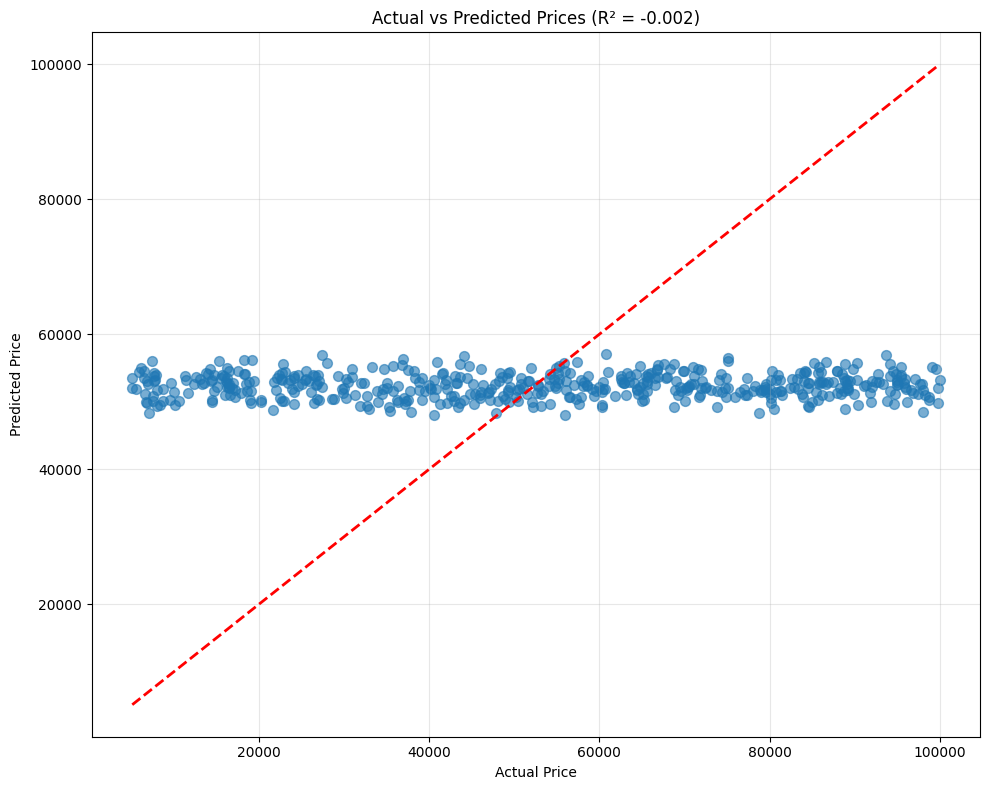

In [ ]:
#Visualizations
# Step 9: SINGLE SCATTER CHART
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (R² = {:.3f})'.format(r2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
#Predict new car (simple)

sample_cars = pd.DataFrame([
    [2020, 2.0, 0, 0, 80000, 1, 0, 0],  # Economy
    [2023, 4.0, 1, 1, 15000, 4, 5, 2],  # Luxury
    [2018, 3.5, 2, 0, 45000, 2, 3, 1]   # Mid-range
], columns=X.columns)

predictions = model.predict(sample_cars)

# Step 10: EXCEL STYLE PREDICTION TABLE (IDENTICAL to Step 2)
print("\nSTEP 10: PREDICTION RESULTS")
print("="*80)
display(pred_table.style.
        format({
            'Year': '{:.0f}',
            'Engine_L': '{:.1f}',
            'Mileage': '{:,.0f}',
            'Pred_Price': '${:,.0f}',
            'Low_Range': '${:,.0f}',
            'High_Range': '${:,.0f}'
        }).set_table_styles([
            {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ]))



STEP 10: PREDICTION RESULTS


,Car_Type,Year,Engine(L),Mileage,Predicted_Price,Low_Estimate,High_Estimate
0,Economy,2020,2.000000,"80,000",64826499.000000,64798949.000000,64854049.000000
1,Luxury,2023,4.000000,"15,000",12367800.000000,12340250.000000,12395350.000000
2,Mid-range,2018,3.500000,"45,000",36579960.000000,36552410.000000,36607510.000000
